<a href="https://colab.research.google.com/github/sarang-manohar/hogwarts/blob/main/academia/dataMining/code/rf_hr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone 'https://github.com/sarang-manohar/hogwarts.git'

Cloning into 'hogwarts'...
remote: Enumerating objects: 207, done.
remote: Counting objects: 100% (207/207), done.
remote: Compressing objects: 100% (173/173), done.
remote: Total 207 (delta 110), reused 81 (delta 19), pack-reused 0
Receiving objects: 100% (207/207), 23.67 MiB | 20.21 MiB/s, done.
Resolving deltas: 100% (110/110), done.


Path on git

academia/dataMining/code/rf_hr.ipynb

In [62]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-talk')

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [63]:
rd=pd.read_csv(r'/content/hogwarts/academia/dataMining/data/hrdata.csv')

display(rd)

,Unnamed: 0,employee_id,department,education,gender,no_of_trainings,age,last_promotion_rating,employee_since_years,all_tasks_completed,training_marks,is_promoted
0,0,2001001,Sales & Marketing,Master's & above,f,1,35,5,8,1,49,0
1,1,2001002,Operations,Bachelor's,m,1,30,5,4,0,60,0
2,2,2001003,Sales & Marketing,Bachelor's,m,1,34,3,7,0,50,0
3,3,2001004,Sales & Marketing,Bachelor's,m,2,39,1,10,0,50,0
4,4,2001005,Technology,Bachelor's,m,1,45,3,2,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48655,54802,2049656,Sales & Marketing,Bachelor's,m,2,31,1,2,0,49,0
48656,54803,2049657,Technology,Bachelor's,m,1,48,3,17,0,78,0
48657,54804,2049658,Operations,Master's & above,f,1,37,2,6,0,56,0
48658,54805,2049659,Analytics,Bachelor's,m,1,27,5,3,1,79,0


In [64]:
rd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48660 entries, 0 to 48659
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Unnamed: 0             48660 non-null  int64 
 1   employee_id            48660 non-null  int64 
 2   department             48660 non-null  object
 3   education              48660 non-null  object
 4   gender                 48660 non-null  object
 5   no_of_trainings        48660 non-null  int64 
 6   age                    48660 non-null  int64 
 7   last_promotion_rating  48660 non-null  int64 
 8   employee_since_years   48660 non-null  int64 
 9   all_tasks_completed    48660 non-null  int64 
 10  training_marks         48660 non-null  int64 
 11  is_promoted            48660 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 4.5+ MB


In [65]:
rd.describe()

,Unnamed: 0,employee_id,no_of_trainings,age,last_promotion_rating,employee_since_years,all_tasks_completed,training_marks,is_promoted
count,48660.000000,4.866000e+04,48660.000000,48660.000000,48660.000000,48660.00000,48660.000000,48660.000000,48660.000000
mean,27440.951541,2.025330e+06,1.251993,35.589437,3.337526,6.31157,0.356473,63.603309,0.086971
std,15824.359536,1.404708e+04,0.604994,7.534571,1.257922,4.20476,0.478962,13.273502,0.281795
min,0.000000,2.001001e+06,1.000000,20.000000,1.000000,1.00000,0.000000,39.000000,0.000000
25%,13712.750000,2.013166e+06,1.000000,30.000000,3.000000,3.00000,0.000000,51.000000,0.000000
50%,27466.500000,2.025330e+06,1.000000,34.000000,3.000000,5.00000,0.000000,60.000000,0.000000
75%,41142.250000,2.037495e+06,1.000000,39.000000,4.000000,8.00000,1.000000,76.000000,0.000000
max,54807.000000,2.049660e+06,10.000000,60.000000,5.000000,37.00000,1.000000,99.000000,1.000000


In [66]:
dups = rd.duplicated()
rd[dups]

,Unnamed: 0,employee_id,department,education,gender,no_of_trainings,age,last_promotion_rating,employee_since_years,all_tasks_completed,training_marks,is_promoted


In [67]:
rd = rd.drop({'Unnamed: 0','employee_id'}, axis=1)
display(rd)

,department,education,gender,no_of_trainings,age,last_promotion_rating,employee_since_years,all_tasks_completed,training_marks,is_promoted
0,Sales & Marketing,Master's & above,f,1,35,5,8,1,49,0
1,Operations,Bachelor's,m,1,30,5,4,0,60,0
2,Sales & Marketing,Bachelor's,m,1,34,3,7,0,50,0
3,Sales & Marketing,Bachelor's,m,2,39,1,10,0,50,0
4,Technology,Bachelor's,m,1,45,3,2,0,73,0
...,...,...,...,...,...,...,...,...,...,...
48655,Sales & Marketing,Bachelor's,m,2,31,1,2,0,49,0
48656,Technology,Bachelor's,m,1,48,3,17,0,78,0
48657,Operations,Master's & above,f,1,37,2,6,0,56,0
48658,Analytics,Bachelor's,m,1,27,5,3,1,79,0


In [68]:
rd.department.value_counts()

Sales & Marketing    14239
Operations           10547
Procurement           6641
Technology            6502
Analytics             4610
Finance               2219
HR                    2142
R&D                    893
Legal                  867
Name: department, dtype: int64

In [69]:
rd.education.value_counts()

Bachelor's          33404
Master's & above    14798
Below Secondary       458
Name: education, dtype: int64

In [70]:
rd.gender.value_counts()

m    33852
f    14808
Name: gender, dtype: int64

In [71]:
rd.columns

Index(['department', 'education', 'gender', 'no_of_trainings', 'age',
       'last_promotion_rating', 'employee_since_years', 'all_tasks_completed',
       'training_marks', 'is_promoted'],
      dtype='object')

In [72]:
rd_con = rd[{'no_of_trainings', 'age', 'last_promotion_rating', 'employee_since_years', 'all_tasks_completed', 'training_marks'}]

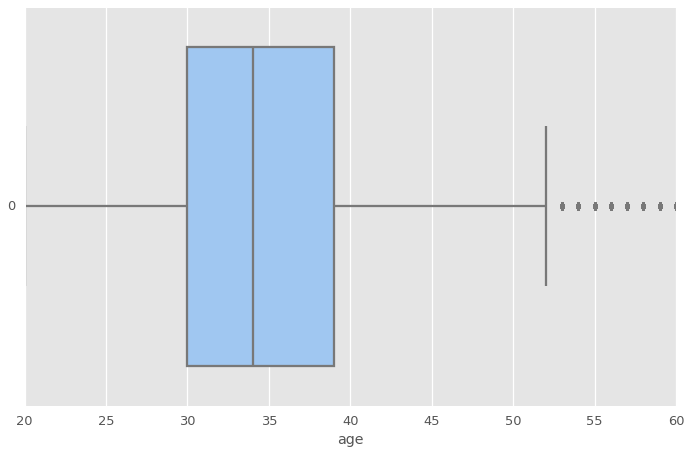

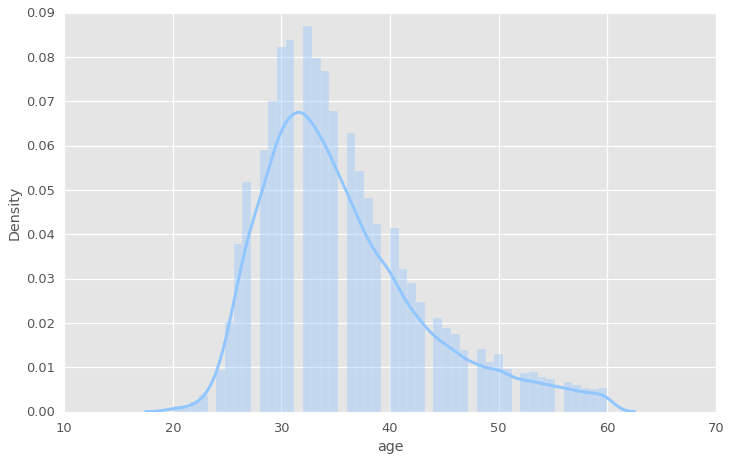

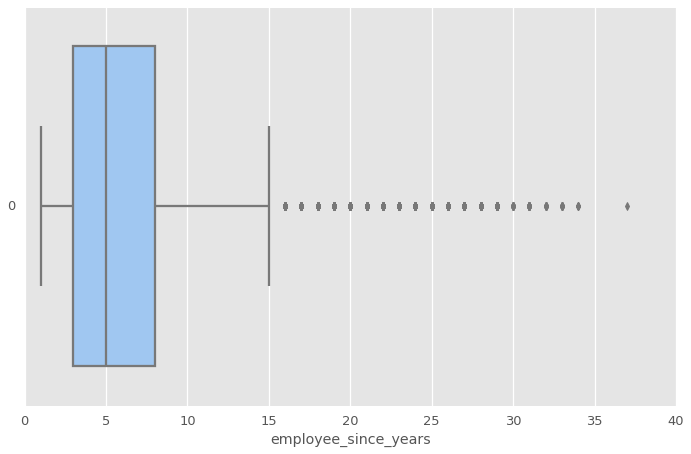

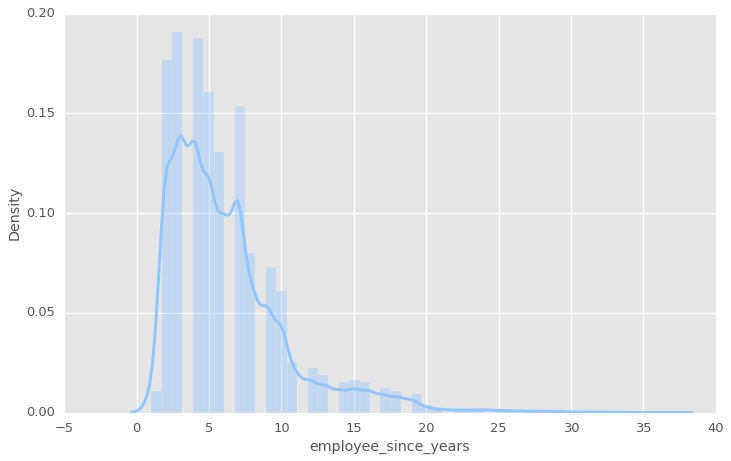

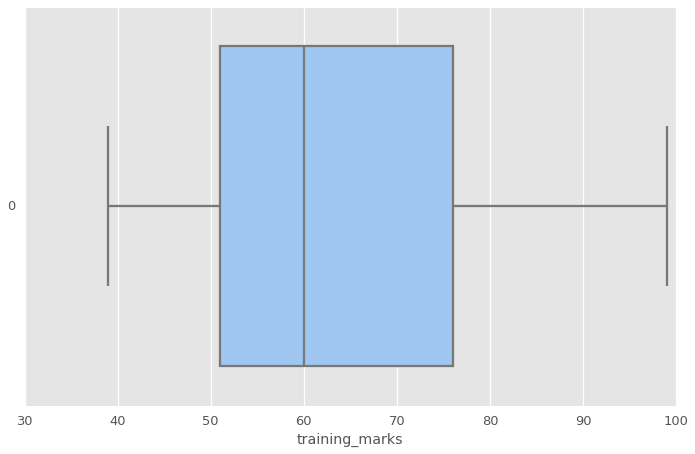

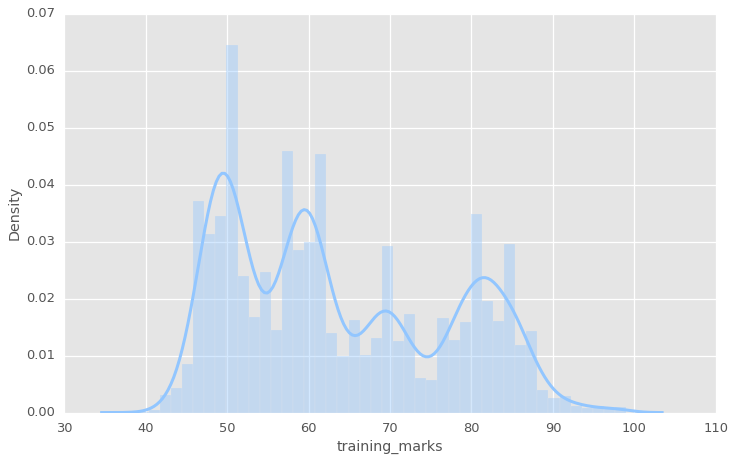

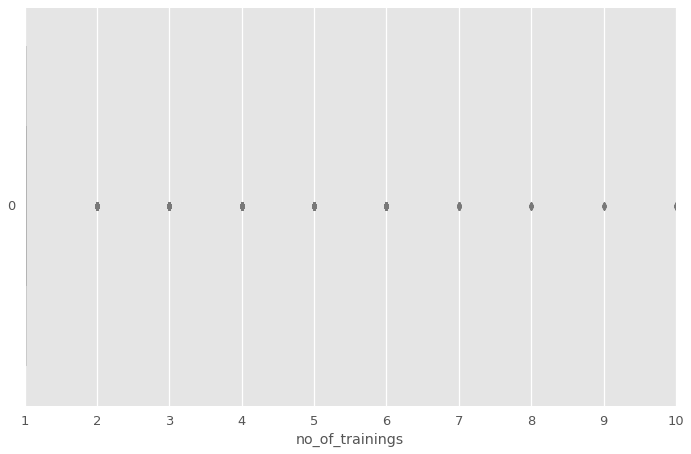

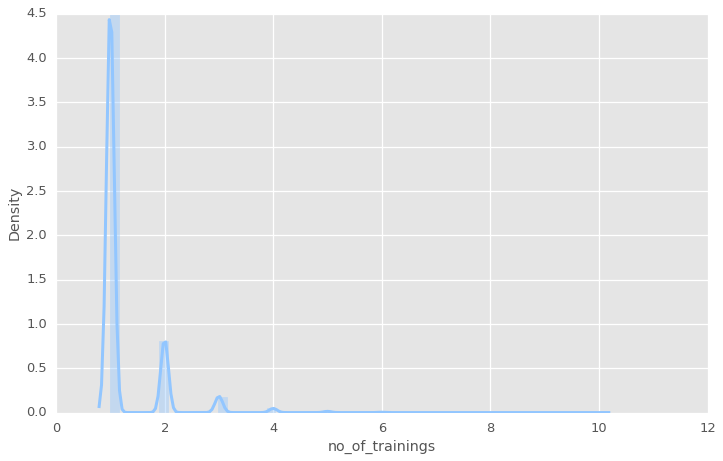

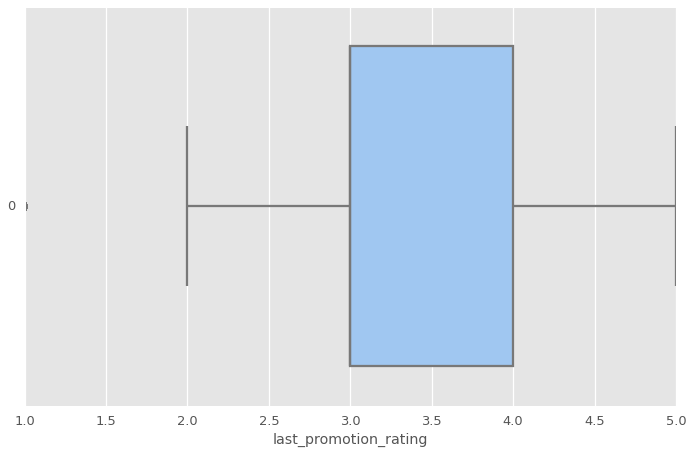

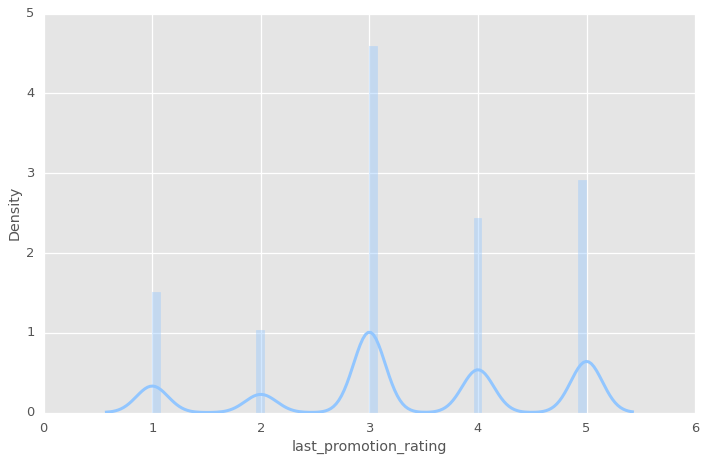

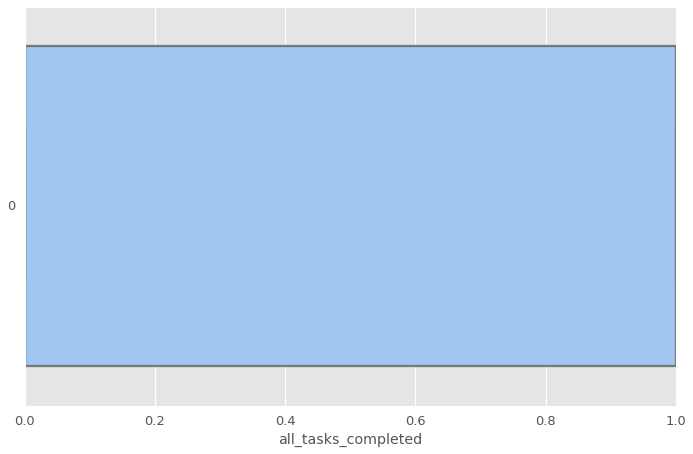

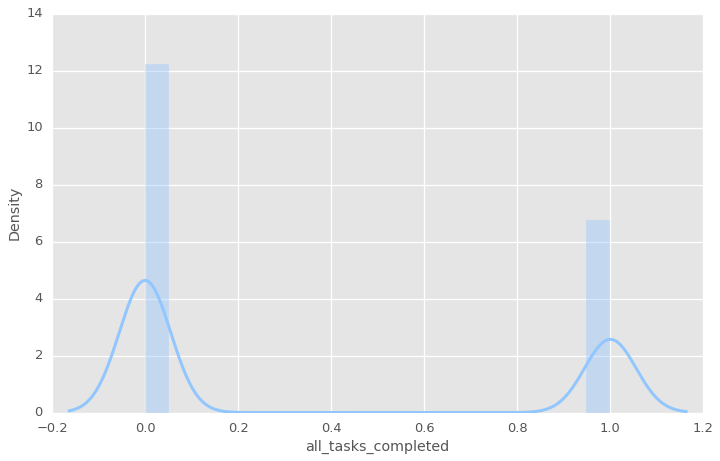

In [73]:
for var in rd_con.columns:
    sns.boxplot(data=rd[var],orient='h')
    plt.xlabel(var)
    plt.show()
    sns.distplot(rd[var],hist_kws = { 'label': var},kde_kws={"lw": 3, "label": "KDE"})
    plt.xlabel(var)
    plt.show()

In [74]:
for var in rd.columns: 
    if rd[var].dtype == 'object': 
        print('\n')
        print('var:',var)
        print(pd.Categorical(rd[var].unique()))
        print(pd.Categorical(rd[var].unique()).codes)
        rd[var] = pd.Categorical(rd[var]).codes



var: department
['Sales & Marketing', 'Operations', 'Technology', 'Analytics', 'R&D', 'Procurement', 'Finance', 'HR', 'Legal']
Categories (9, object): ['Analytics', 'Finance', 'HR', 'Legal', ..., 'Procurement', 'R&D',
                         'Sales & Marketing', 'Technology']
[7 4 8 0 6 5 1 2 3]


var: education
['Master's & above', 'Bachelor's', 'Below Secondary']
Categories (3, object): ['Bachelor's', 'Below Secondary', 'Master's & above']
[2 0 1]


var: gender
['f', 'm']
Categories (2, object): ['f', 'm']
[0 1]


In [75]:
display(rd)

,department,education,gender,no_of_trainings,age,last_promotion_rating,employee_since_years,all_tasks_completed,training_marks,is_promoted
0,7,2,0,1,35,5,8,1,49,0
1,4,0,1,1,30,5,4,0,60,0
2,7,0,1,1,34,3,7,0,50,0
3,7,0,1,2,39,1,10,0,50,0
4,8,0,1,1,45,3,2,0,73,0
...,...,...,...,...,...,...,...,...,...,...
48655,7,0,1,2,31,1,2,0,49,0
48656,8,0,1,1,48,3,17,0,78,0
48657,4,2,0,1,37,2,6,0,56,0
48658,0,0,1,1,27,5,3,1,79,0


In [76]:
rd['is_promoted'].value_counts(normalize=True)

0    0.913029
1    0.086971
Name: is_promoted, dtype: float64

In [77]:
X = rd.drop({'is_promoted'}, axis=1)

y = rd.pop('is_promoted')

In [106]:
X_train, X_test, train_labels, test_labels = train_test_split(X,y,test_size=0.1, random_state=1)

In [79]:
rf = RandomForestClassifier()
rf.fit(X_train, train_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

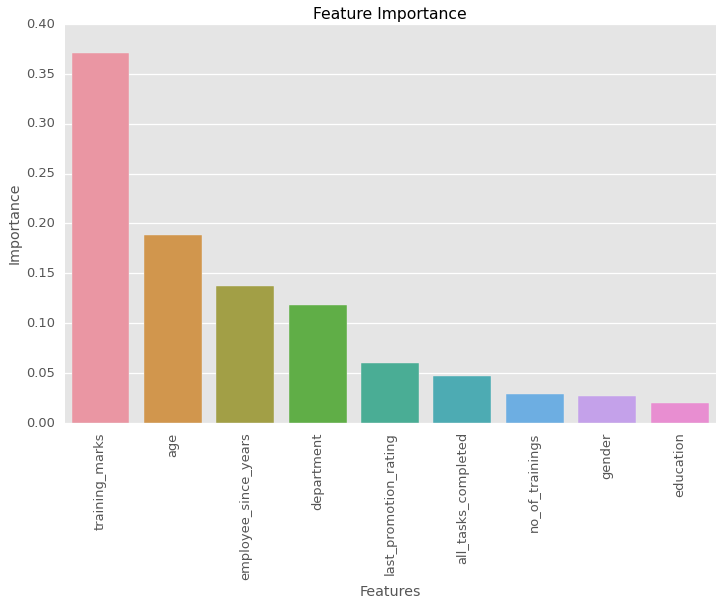

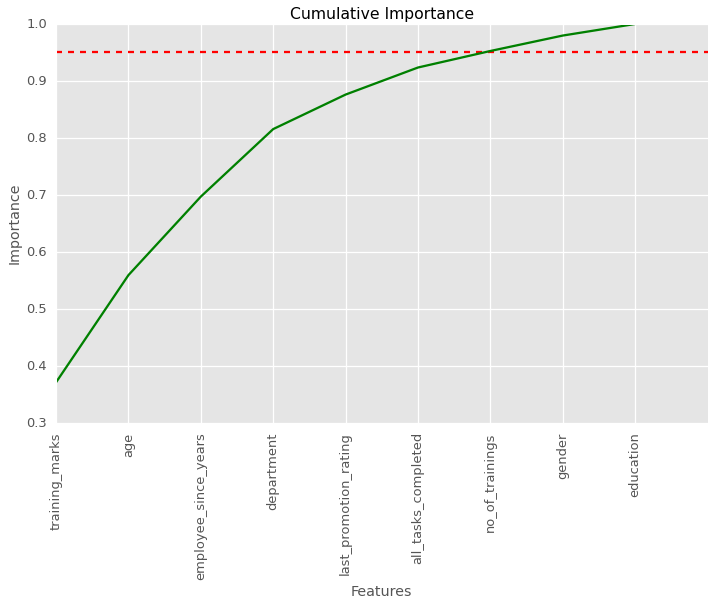

In [80]:
importances = pd.DataFrame(rf.feature_importances_, columns = ['Imp'], index = X_train.columns)
importances['features'] = pd.DataFrame(rf.feature_importances_, columns = ['Imp'], index = X_train.columns).index
importances.reset_index

importances = importances.sort_values(by='Imp', ascending=False)
importances.set_index(np.arange(0,importances.shape[0]),inplace = True)

importances['cumsum'] = np.cumsum(importances.Imp)
x_vals = list(range(len(importances)))

sns.barplot(data = importances, x='features', y='Imp')
plt.xticks(x_vals, importances['features'], rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Features'); plt.title('Feature Importance');
plt.show()

plt.plot(x_vals, importances['cumsum'], 'g-')
plt.hlines(y = 0.95, xmin=0, xmax=len(importances), color = 'r', linestyles = 'dashed')
plt.xticks(x_vals, importances['features'], rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Features'); plt.title('Cumulative Importance');
plt.show()

In [111]:
rf_param_grid = {
    #'max_depth' : [7],
    'min_samples_leaf' : [20],
    'min_samples_split' : [10],
    'max_features' : [3],
    'n_estimators' : [1000]
}

In [112]:
rf_ht = RandomForestClassifier()
rf_gs = GridSearchCV(estimator=rf_ht, param_grid=rf_param_grid, cv = 3)
rf_gs.fit(X_train, train_labels)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [113]:
print(rf_gs.best_params_)
best_rf = rf_gs.best_estimator_
ytrain_predict = best_rf.predict(X_train)
ytest_predict = best_rf.predict(X_test)

{'max_features': 3, 'min_samples_leaf': 20, 'min_samples_split': 10, 'n_estimators': 1000}


In [84]:
#{'max_depth': 7, 'max_features': 3, 'min_samples_leaf': 100, 'min_samples_split': 60, 'n_estimators': 100}
#Train data Confusion Matrix
print('Random Forest stats on train data:')
print(confusion_matrix(train_labels, ytrain_predict))
#Train Data Accuracy
print('Accuracy score : %.1f percent' % (best_rf.score(X_train,train_labels)*100) )
print(classification_report(train_labels, ytrain_predict))
print('\n')
#Test data Confusion Matrix
print('Random Forest stats on test data:')
print(confusion_matrix(test_labels, ytest_predict))
#Test Data Accuracy
print('Accuracy score : %.1f percent' % (best_rf.score(X_test,test_labels)*100) )
print(classification_report(test_labels, ytest_predict))

Random Forest stats on train data:
[[31079    44]
 [ 2577   362]]
Accuracy score : 92.3 percent
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     31123
           1       0.89      0.12      0.22      2939

    accuracy                           0.92     34062
   macro avg       0.91      0.56      0.59     34062
weighted avg       0.92      0.92      0.90     34062



Random Forest stats on test data:
[[13282    23]
 [ 1131   162]]
Accuracy score : 92.1 percent
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     13305
           1       0.88      0.13      0.22      1293

    accuracy                           0.92     14598
   macro avg       0.90      0.56      0.59     14598
weighted avg       0.92      0.92      0.89     14598



In [85]:
#{'max_features': 3, 'min_samples_leaf': 50, 'min_samples_split': 60, 'n_estimators': 300}
#Train data Confusion Matrix
print('Random Forest stats on train data:')
print(confusion_matrix(train_labels, ytrain_predict))
#Train Data Accuracy
print('Accuracy score : %.1f percent' % (best_rf.score(X_train,train_labels)*100) )
print(classification_report(train_labels, ytrain_predict))
print('\n')
#Test data Confusion Matrix
print('Random Forest stats on test data:')
print(confusion_matrix(test_labels, ytest_predict))
#Test Data Accuracy
print('Accuracy score : %.1f percent' % (best_rf.score(X_test,test_labels)*100) )
print(classification_report(test_labels, ytest_predict))

Random Forest stats on train data:
[[31079    44]
 [ 2577   362]]
Accuracy score : 92.3 percent
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     31123
           1       0.89      0.12      0.22      2939

    accuracy                           0.92     34062
   macro avg       0.91      0.56      0.59     34062
weighted avg       0.92      0.92      0.90     34062



Random Forest stats on test data:
[[13282    23]
 [ 1131   162]]
Accuracy score : 92.1 percent
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     13305
           1       0.88      0.13      0.22      1293

    accuracy                           0.92     14598
   macro avg       0.90      0.56      0.59     14598
weighted avg       0.92      0.92      0.89     14598



In [89]:
#{'max_features': 3, 'min_samples_split': 30, 'n_estimators': 300}
#Train data Confusion Matrix
print('Random Forest stats on train data:')
print(confusion_matrix(train_labels, ytrain_predict))
#Train Data Accuracy
print('Accuracy score : %.1f percent' % (best_rf.score(X_train,train_labels)*100) )
print(classification_report(train_labels, ytrain_predict))
print('\n')
#Test data Confusion Matrix
print('Random Forest stats on test data:')
print(confusion_matrix(test_labels, ytest_predict))
#Test Data Accuracy
print('Accuracy score : %.1f percent' % (best_rf.score(X_test,test_labels)*100) )
print(classification_report(test_labels, ytest_predict))

Random Forest stats on train data:
[[31086    37]
 [ 1963   976]]
Accuracy score : 94.1 percent
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     31123
           1       0.96      0.33      0.49      2939

    accuracy                           0.94     34062
   macro avg       0.95      0.67      0.73     34062
weighted avg       0.94      0.94      0.93     34062



Random Forest stats on test data:
[[13282    23]
 [  901   392]]
Accuracy score : 93.7 percent
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     13305
           1       0.94      0.30      0.46      1293

    accuracy                           0.94     14598
   macro avg       0.94      0.65      0.71     14598
weighted avg       0.94      0.94      0.92     14598



In [93]:
#{'max_features': 3}
#Train data Confusion Matrix
print('Random Forest stats on train data:')
print(confusion_matrix(train_labels, ytrain_predict))
#Train Data Accuracy
print('Accuracy score : %.1f percent' % (best_rf.score(X_train,train_labels)*100) )
print(classification_report(train_labels, ytrain_predict))
print('\n')
#Test data Confusion Matrix
print('Random Forest stats on test data:')
print(confusion_matrix(test_labels, ytest_predict))
#Test Data Accuracy
print('Accuracy score : %.1f percent' % (best_rf.score(X_test,test_labels)*100) )
print(classification_report(test_labels, ytest_predict))

Random Forest stats on train data:
[[31101    22]
 [  141  2798]]
Accuracy score : 99.5 percent
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31123
           1       0.99      0.95      0.97      2939

    accuracy                           1.00     34062
   macro avg       0.99      0.98      0.98     34062
weighted avg       1.00      1.00      1.00     34062



Random Forest stats on test data:
[[13136   169]
 [  852   441]]
Accuracy score : 93.0 percent
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     13305
           1       0.72      0.34      0.46      1293

    accuracy                           0.93     14598
   macro avg       0.83      0.66      0.71     14598
weighted avg       0.92      0.93      0.92     14598



In [97]:
#{'max_features': 3, 'min_samples_split': 30}
#Train data Confusion Matrix
print('Random Forest stats on train data:')
print(confusion_matrix(train_labels, ytrain_predict))
#Train Data Accuracy
print('Accuracy score : %.1f percent' % (best_rf.score(X_train,train_labels)*100) )
print(classification_report(train_labels, ytrain_predict))
print('\n')
#Test data Confusion Matrix
print('Random Forest stats on test data:')
print(confusion_matrix(test_labels, ytest_predict))
#Test Data Accuracy
print('Accuracy score : %.1f percent' % (best_rf.score(X_test,test_labels)*100) )
print(classification_report(test_labels, ytest_predict))

Random Forest stats on train data:
[[31085    38]
 [ 1965   974]]
Accuracy score : 94.1 percent
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     31123
           1       0.96      0.33      0.49      2939

    accuracy                           0.94     34062
   macro avg       0.95      0.67      0.73     34062
weighted avg       0.94      0.94      0.93     34062



Random Forest stats on test data:
[[13278    27]
 [  904   389]]
Accuracy score : 93.6 percent
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     13305
           1       0.94      0.30      0.46      1293

    accuracy                           0.94     14598
   macro avg       0.94      0.65      0.71     14598
weighted avg       0.94      0.94      0.92     14598



In [101]:
#{'max_features': 3, 'min_samples_split': 30, 'n_estimators': 1000}
#Train data Confusion Matrix
print('Random Forest stats on train data:')
print(confusion_matrix(train_labels, ytrain_predict))
#Train Data Accuracy
print('Accuracy score : %.1f percent' % (best_rf.score(X_train,train_labels)*100) )
print(classification_report(train_labels, ytrain_predict))
print('\n')
#Test data Confusion Matrix
print('Random Forest stats on test data:')
print(confusion_matrix(test_labels, ytest_predict))
#Test Data Accuracy
print('Accuracy score : %.1f percent' % (best_rf.score(X_test,test_labels)*100) )
print(classification_report(test_labels, ytest_predict))

Random Forest stats on train data:
[[31087    36]
 [ 1967   972]]
Accuracy score : 94.1 percent
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     31123
           1       0.96      0.33      0.49      2939

    accuracy                           0.94     34062
   macro avg       0.95      0.66      0.73     34062
weighted avg       0.94      0.94      0.93     34062



Random Forest stats on test data:
[[13278    27]
 [  908   385]]
Accuracy score : 93.6 percent
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     13305
           1       0.93      0.30      0.45      1293

    accuracy                           0.94     14598
   macro avg       0.94      0.65      0.71     14598
weighted avg       0.94      0.94      0.92     14598



In [105]:
#{'max_features': 3, 'min_samples_split': 10, 'n_estimators': 1000}
#Train data Confusion Matrix
print('Random Forest stats on train data:')
print(confusion_matrix(train_labels, ytrain_predict))
#Train Data Accuracy
print('Accuracy score : %.1f percent' % (best_rf.score(X_train,train_labels)*100) )
print(classification_report(train_labels, ytrain_predict))
print('\n')
#Test data Confusion Matrix
print('Random Forest stats on test data:')
print(confusion_matrix(test_labels, ytest_predict))
#Test Data Accuracy
print('Accuracy score : %.1f percent' % (best_rf.score(X_test,test_labels)*100) )
print(classification_report(test_labels, ytest_predict))

Random Forest stats on train data:
[[31101    22]
 [ 1736  1203]]
Accuracy score : 94.8 percent
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     31123
           1       0.98      0.41      0.58      2939

    accuracy                           0.95     34062
   macro avg       0.96      0.70      0.78     34062
weighted avg       0.95      0.95      0.94     34062



Random Forest stats on test data:
[[13269    36]
 [  879   414]]
Accuracy score : 93.7 percent
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     13305
           1       0.92      0.32      0.48      1293

    accuracy                           0.94     14598
   macro avg       0.93      0.66      0.72     14598
weighted avg       0.94      0.94      0.92     14598



In [110]:
#{'max_features': 3, 'min_samples_split': 10, 'n_estimators': 1000}, train:test = 90:10
#Train data Confusion Matrix
print('Random Forest stats on train data:')
print(confusion_matrix(train_labels, ytrain_predict))
#Train Data Accuracy
print('Accuracy score : %.1f percent' % (best_rf.score(X_train,train_labels)*100) )
print(classification_report(train_labels, ytrain_predict))
print('\n')
#Test data Confusion Matrix
print('Random Forest stats on test data:')
print(confusion_matrix(test_labels, ytest_predict))
#Test Data Accuracy
print('Accuracy score : %.1f percent' % (best_rf.score(X_test,test_labels)*100) )
print(classification_report(test_labels, ytest_predict))

Random Forest stats on train data:
[[39968    31]
 [ 2226  1569]]
Accuracy score : 94.8 percent
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     39999
           1       0.98      0.41      0.58      3795

    accuracy                           0.95     43794
   macro avg       0.96      0.71      0.78     43794
weighted avg       0.95      0.95      0.94     43794



Random Forest stats on test data:
[[4414   15]
 [ 289  148]]
Accuracy score : 93.8 percent
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      4429
           1       0.91      0.34      0.49       437

    accuracy                           0.94      4866
   macro avg       0.92      0.67      0.73      4866
weighted avg       0.94      0.94      0.92      4866



In [114]:
#{'max_features': 3,  'min_samples_leaf': 20, 'min_samples_split': 10, 'n_estimators': 1000}, train:test = 90:10
#Train data Confusion Matrix
print('Random Forest stats on train data:')
print(confusion_matrix(train_labels, ytrain_predict))
#Train Data Accuracy
print('Accuracy score : %.1f percent' % (best_rf.score(X_train,train_labels)*100) )
print(classification_report(train_labels, ytrain_predict))
print('\n')
#Test data Confusion Matrix
print('Random Forest stats on test data:')
print(confusion_matrix(test_labels, ytest_predict))
#Test Data Accuracy
print('Accuracy score : %.1f percent' % (best_rf.score(X_test,test_labels)*100) )
print(classification_report(test_labels, ytest_predict))

Random Forest stats on train data:
[[39951    48]
 [ 2950   845]]
Accuracy score : 93.2 percent
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     39999
           1       0.95      0.22      0.36      3795

    accuracy                           0.93     43794
   macro avg       0.94      0.61      0.66     43794
weighted avg       0.93      0.93      0.91     43794



Random Forest stats on test data:
[[4424    5]
 [ 339   98]]
Accuracy score : 92.9 percent
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      4429
           1       0.95      0.22      0.36       437

    accuracy                           0.93      4866
   macro avg       0.94      0.61      0.66      4866
weighted avg       0.93      0.93      0.91      4866

